In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import matplotlib.pyplot as plt


import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine.
# finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
Name: quality, dtype: float64


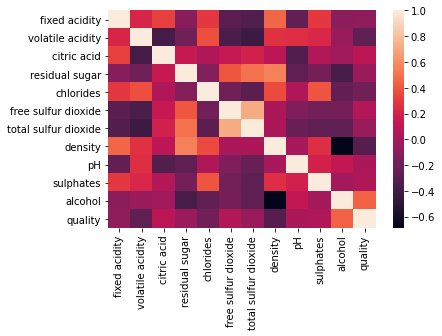

In [6]:
sns.heatmap(df.corr())
plt.show()

In [7]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [8]:

# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.07)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'density', 'alcohol']


In [9]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,density,alcohol
0,7.4,0.70,0.00,0.076,0.99780,9.4
1,7.8,0.88,0.00,0.098,0.99680,9.8
2,7.8,0.76,0.04,0.092,0.99700,9.8
3,11.2,0.28,0.56,0.075,0.99800,9.8
4,7.4,0.70,0.00,0.076,0.99780,9.4
...,...,...,...,...,...,...
6492,6.2,0.21,0.29,0.039,0.99114,11.2
6493,6.6,0.32,0.36,0.047,0.99490,9.6
6494,6.5,0.24,0.19,0.041,0.99254,9.4
6495,5.5,0.29,0.30,0.022,0.98869,12.8


In [10]:
y

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [12]:

# x_train.shape
# x_test.shape
# y_train.shape
y_test.shape

(1625,)

In [13]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
# this gives the coefficients of the 10 features selected above. 
regressor.coef_

array([-2.71204164e-02, -1.55113041e+00, -1.33999905e-01,  5.04412543e-02,
        4.72340142e+01,  4.01634059e-01])

In [15]:
train_pred = regressor.predict(x_train)
train_pred

array([5.69055148, 5.58998968, 5.73597998, ..., 5.88989019, 4.9152647 ,
       5.64477665])

In [16]:

test_pred = regressor.predict(x_test)
test_pred

array([5.53429023, 5.65688092, 5.70932006, ..., 5.83622991, 5.00510218,
       6.57993959])

In [19]:
from sklearn import metrics

In [24]:

MSE_train = metrics.mean_squared_error(y_train, train_pred)
MSE_test = metrics.mean_squared_error(y_test, test_pred)

In [25]:

#train_rmse = mean_squared_error(train_pred, y_train)**0.5
#train_rmse

In [26]:
#test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
#test_rmse

In [27]:
# The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. 
# The RMSE for your training and your test sets should be very similar if you have built a good model. 
# If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data

In [28]:

# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data

array([6., 6., 6., ..., 6., 5., 7.])

In [29]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.5773159844081076
Mean Squared Error: 0.5440731852868741
Root Mean Squared Error: 0.7376131677830013


In [30]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients
#These numbers mean that holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features
#These numbers mean that holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in Quality of wine, and similarly for the other features

,Coeffecient
fixed acidity,-0.027120
volatile acidity,-1.551130
citric acid,-0.134000
chlorides,0.050441
density,47.234014
alcohol,0.401634


In [ ]:
#newdf = car_dummy[(car_dummy < (Q1 - 1.5 * IQR)) |(car_dummy > (Q3 + 1.5 * IQR))]   # create a variable and check for outliers and drop them off
   # return newdf # your created variable